# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [3]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [4]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

C:\Users\harbohra\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


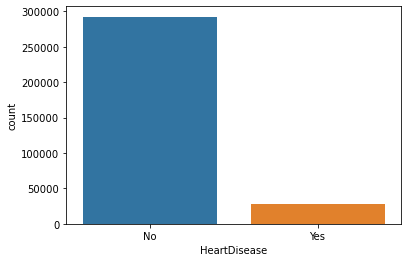

In [5]:
sns.countplot(df['HeartDisease'])
plt.show()

The counts of the two classes are extremely unbalanced, this might cause our model to be naively biased towards the _No_ class

In [6]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

No missing values found

In [7]:
continuous_vars=df.select_dtypes('float64').columns
print(continuous_vars)
categorical_vars=df.select_dtypes('object').columns
print(categorical_vars)

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')
Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


# Categorical Variables

In [8]:
for col in categorical_vars:
    print(col, "-->", df[col].unique())

HeartDisease --> ['No' 'Yes']
Smoking --> ['Yes' 'No']
AlcoholDrinking --> ['No' 'Yes']
Stroke --> ['No' 'Yes']
DiffWalking --> ['No' 'Yes']
Sex --> ['Female' 'Male']
AgeCategory --> ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race --> ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic --> ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity --> ['Yes' 'No']
GenHealth --> ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma --> ['Yes' 'No']
KidneyDisease --> ['No' 'Yes']
SkinCancer --> ['Yes' 'No']


AgeCategory, GenHealth need to be ordered

In [9]:
#variable AgeCategory has several categories but isn't ordered

from pandas.api.types import CategoricalDtype
df.AgeCategory=df.AgeCategory.astype(CategoricalDtype(ordered=True))
df.AgeCategory.head()

0          55-59
1    80 or older
2          65-69
3          75-79
4          40-44
Name: AgeCategory, dtype: category
Categories (13, object): ['18-24' < '25-29' < '30-34' < '35-39' ... '65-69' < '70-74' < '75-79' < '80 or older']

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

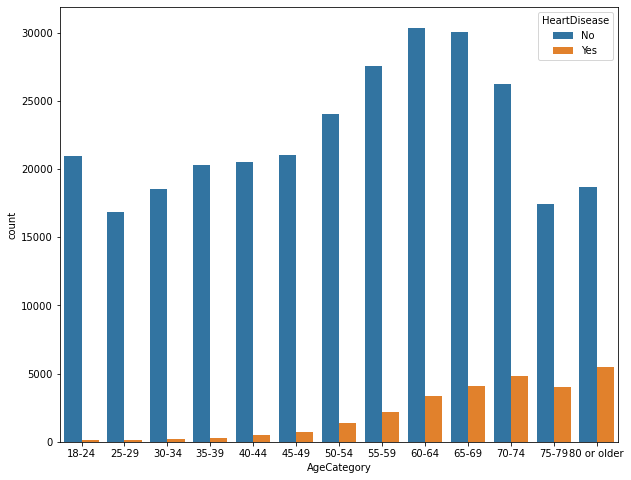

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'AgeCategory',hue = 'HeartDisease' , data = df)

In [11]:
#variable GenHealth has several categories but isn't ordered

df.GenHealth=df.GenHealth.astype(CategoricalDtype(ordered=True))
CategoricalDtype(categories=["Poor","Fair","Good","Very good","Excellent"], ordered=True)
actual_order=["Poor","Fair","Good","Very good","Excellent"]
df.GenHealth=df.GenHealth.astype(CategoricalDtype(ordered=True,categories=actual_order))
df.GenHealth.head()

0    Very good
1    Very good
2         Fair
3         Good
4    Very good
Name: GenHealth, dtype: category
Categories (5, object): ['Poor' < 'Fair' < 'Good' < 'Very good' < 'Excellent']

<AxesSubplot:xlabel='GenHealth', ylabel='count'>

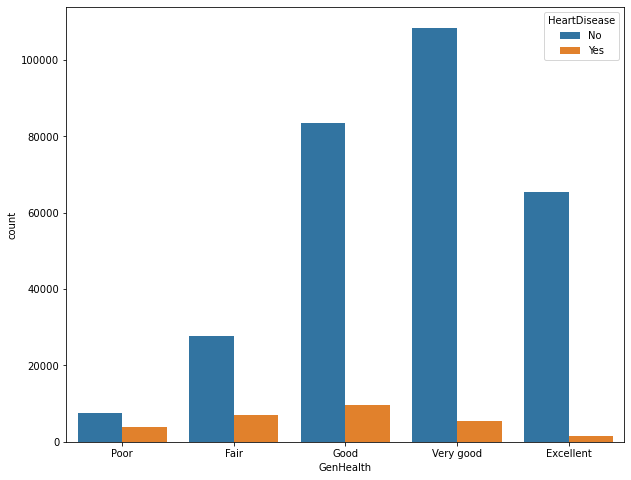

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'GenHealth',hue = 'HeartDisease' , data = df)

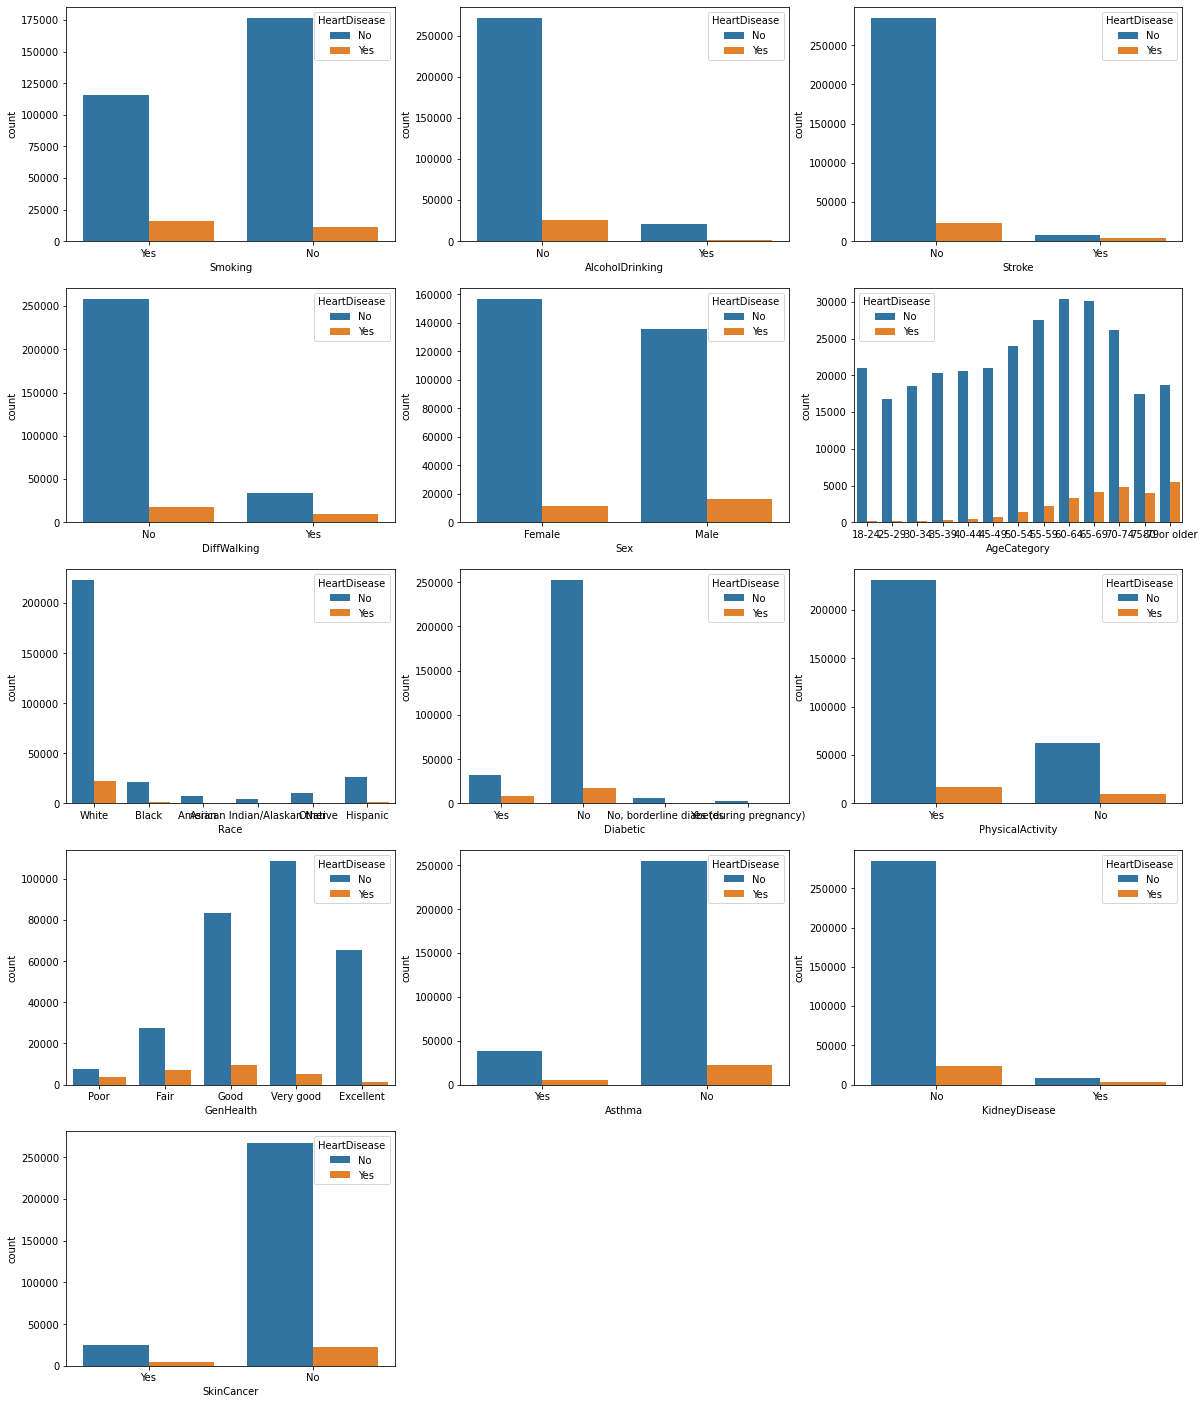

In [20]:
i = 1
plt.figure(figsize = (20,25))
for col in categorical_vars[1:]:
    plt.subplot(5,3,i)
    sns.countplot(x = col,hue = 'HeartDisease' , data = df)
    i +=1
plt.show()

In [22]:
from scipy.stats import chi2_contingency
for col in categorical_vars[1:]:
    data_crosstab = pd.crosstab(df['HeartDisease'], df[col],)
    print(data_crosstab,"\n")
    c, p, dof, expected = chi2_contingency(data_crosstab)
    if p<.05:
        comment="\t ->There is a significant association between those varibles "
    else:
        comment="There is no association those varibles"
    print('p-value is',p,comment,"\n")

Smoking           No     Yes
HeartDisease                
No            176551  115871
Yes            11336   16037 

p-value is 0.0 	 ->There is a significant association between those varibles  

AlcoholDrinking      No    Yes
HeartDisease                  
No               271786  20636
Yes               26232   1141 

p-value is 1.892352227090306e-73 	 ->There is a significant association between those varibles  

Stroke            No   Yes
HeartDisease              
No            284742  7680
Yes            22984  4389 

p-value is 0.0 	 ->There is a significant association between those varibles  

DiffWalking       No    Yes
HeartDisease               
No            258040  34382
Yes            17345  10028 

p-value is 0.0 	 ->There is a significant association between those varibles  

Sex           Female    Male
HeartDisease                
No            156571  135851
Yes            11234   16139 

p-value is 0.0 	 ->There is a significant association between those varibles

# Continuous Variables

C:\Users\harbohra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harbohra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harbohra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

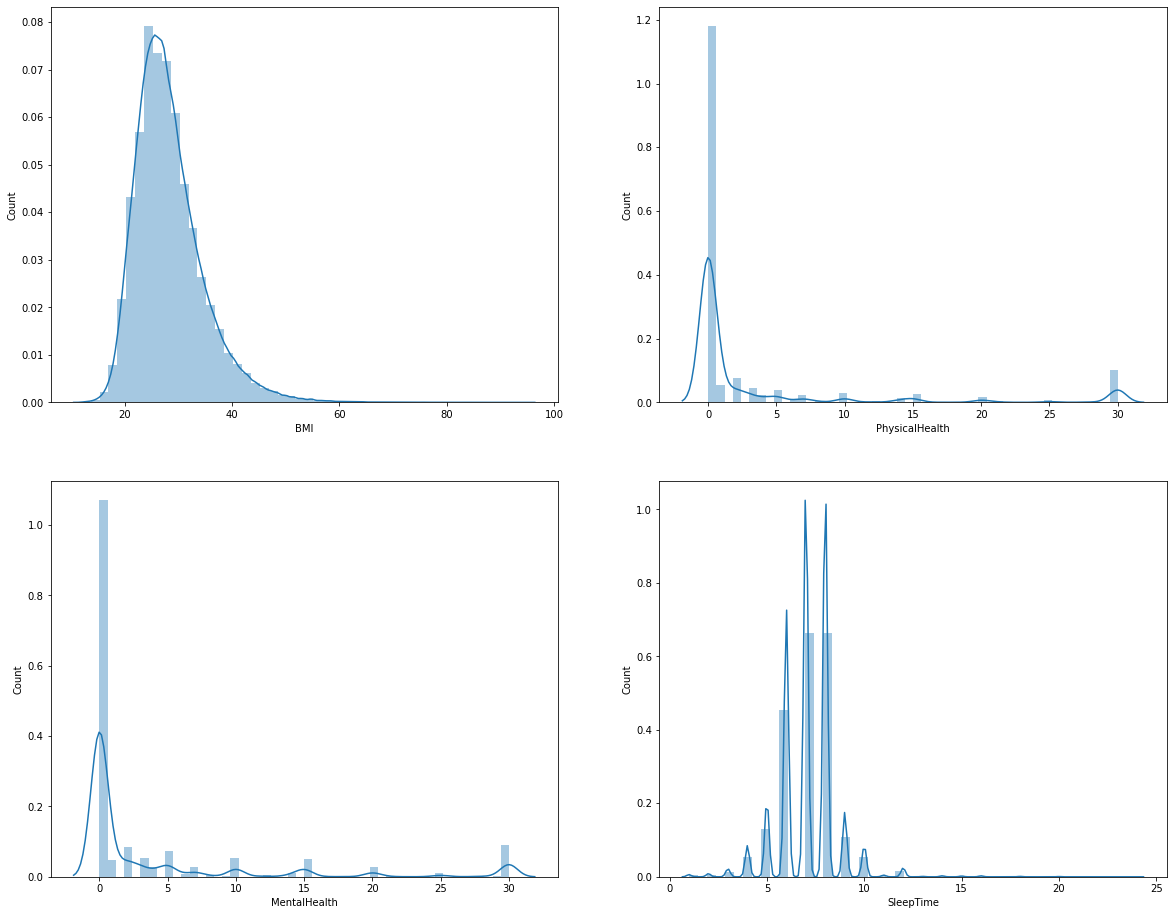

In [15]:
i=1
plt.figure(figsize = (20,16))
for col in continuous_vars:
    plt.subplot(2,2,i)
    sns.distplot(df[col],kde=True)
    plt.xlabel(col)
    plt.ylabel("Count")
    i+=1

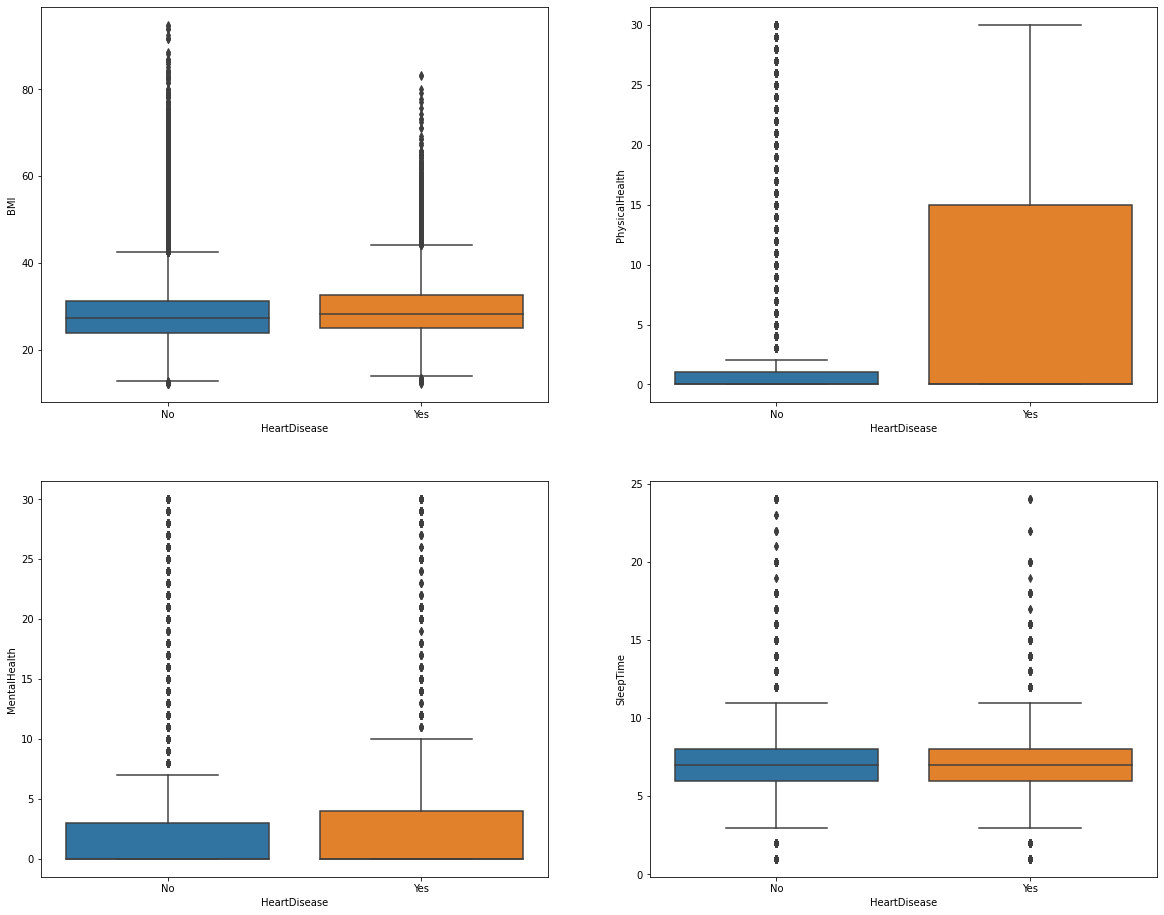

In [16]:
i=1
plt.figure(figsize = (20,16))
for col in continuous_vars:
    plt.subplot(2,2,i)
    sns.boxplot(y = col,x = 'HeartDisease' , data = df)
    i+=1

### Observing Correlation

In [17]:
df_corr=df.select_dtypes(include='float64').corr()
print(df_corr)

                     BMI  PhysicalHealth  MentalHealth  SleepTime
BMI             1.000000        0.109788      0.064131  -0.051822
PhysicalHealth  0.109788        1.000000      0.287987  -0.061387
MentalHealth    0.064131        0.287987      1.000000  -0.119717
SleepTime      -0.051822       -0.061387     -0.119717   1.000000


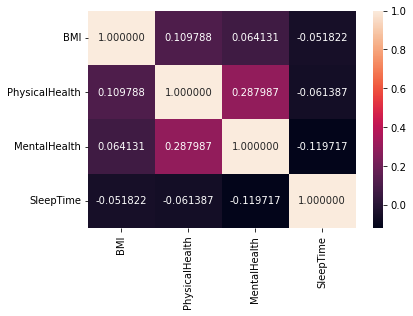

## Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
data=df.copy()
le = LabelEncoder()
col = data[['HeartDisease', 'Smoking', 'AlcoholDrinking','AgeCategory', 'Stroke', 'DiffWalking','Race', 'Sex','PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','GenHealth' ,'Diabetic']]
for i in col:
    data[i] = le.fit_transform(data[i])
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [27]:
features = data.drop(columns=['HeartDisease'],axis=1)
target = data['HeartDisease']


x_train, x_test, y_train, y_test = train_test_split(features, target, shuffle=True, test_size=.2, random_state=44)
print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

x_train

Shape of training feature: (255836, 17)
Shape of testing feature: (63959, 17)
Shape of training label: (255836,)
Shape of testing label: (63959,)


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
213522,30.90,0,1,0,0.0,0.0,0,0,5,5,0,1,4,9.0,0,0,0
124144,29.44,1,1,0,0.0,0.0,0,0,8,5,0,0,2,6.0,0,0,0
230019,20.60,0,0,0,0.0,0.0,0,0,4,5,0,1,0,8.0,0,0,0
209955,23.11,1,0,1,0.0,11.0,0,1,1,5,0,1,1,8.0,0,0,0
165246,35.26,1,0,0,0.0,0.0,0,1,2,5,0,0,2,7.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49723,23.63,1,0,0,30.0,0.0,1,1,7,5,2,1,3,8.0,0,0,0
156845,22.31,0,0,0,1.0,29.0,0,0,1,0,0,1,4,7.0,1,0,0
256753,32.92,1,0,0,0.0,0.0,0,0,9,5,2,0,1,7.0,0,0,0
200099,30.41,0,0,0,0.0,0.0,0,0,4,3,0,0,4,6.0,1,0,0


In [28]:
scaler = StandardScaler()

# Scale training data
x_train = scaler.fit_transform(x_train)

# Scale test data
x_test = scaler.fit_transform(x_test)

In [29]:
x_train

array([[ 0.40438784, -0.83840809,  3.70087306, ..., -0.39281938,
        -0.19512091, -0.32147374],
       [ 0.17470301,  1.19273659,  3.70087306, ..., -0.39281938,
        -0.19512091, -0.32147374],
       [-1.21599143, -0.83840809, -0.27020651, ..., -0.39281938,
        -0.19512091, -0.32147374],
       ...,
       [ 0.72217096,  1.19273659, -0.27020651, ..., -0.39281938,
        -0.19512091, -0.32147374],
       [ 0.32730184, -0.83840809, -0.27020651, ...,  2.54569927,
        -0.19512091, -0.32147374],
       [ 0.6214872 ,  1.19273659, -0.27020651, ..., -0.39281938,
        -0.19512091, -0.32147374]])